In [4]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#Removing duplicates from the data frame
df = df.drop_duplicates()

In [6]:
#Seperating the target variable(value to be predicted)
Y = df['species']  #Variable to be predicted
X = df[['petal_length','petal_width','sepal_length','sepal_width']]

In [7]:
from sklearn import preprocessing
columns_tb_scaled = []
for i in X.columns:
  if X[i].mean()!=0 and X[i].std()!=1:
    columns_tb_scaled.append(i)

X = pd.DataFrame(preprocessing.scale(X[columns_tb_scaled]),columns=columns_tb_scaled) #Scaling the appropriate data
X

,petal_length,petal_width,sepal_length,sepal_width
0,-1.357737,-1.335700,-0.915509,1.019971
1,-1.357737,-1.335700,-1.157560,-0.128082
2,-1.414778,-1.335700,-1.399610,0.331139
3,-1.300696,-1.335700,-1.520635,0.101529
4,-1.357737,-1.335700,-1.036535,1.249582
...,...,...,...,...
142,0.809831,1.444682,1.020892,-0.128082
143,0.695748,0.915085,0.536792,-1.276136
144,0.809831,1.047484,0.778842,-0.128082
145,0.923913,1.444682,0.415766,0.790361


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25) #Splitting the data for testing(25%) and training(75%)

In [9]:
#Training the model on our training data
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

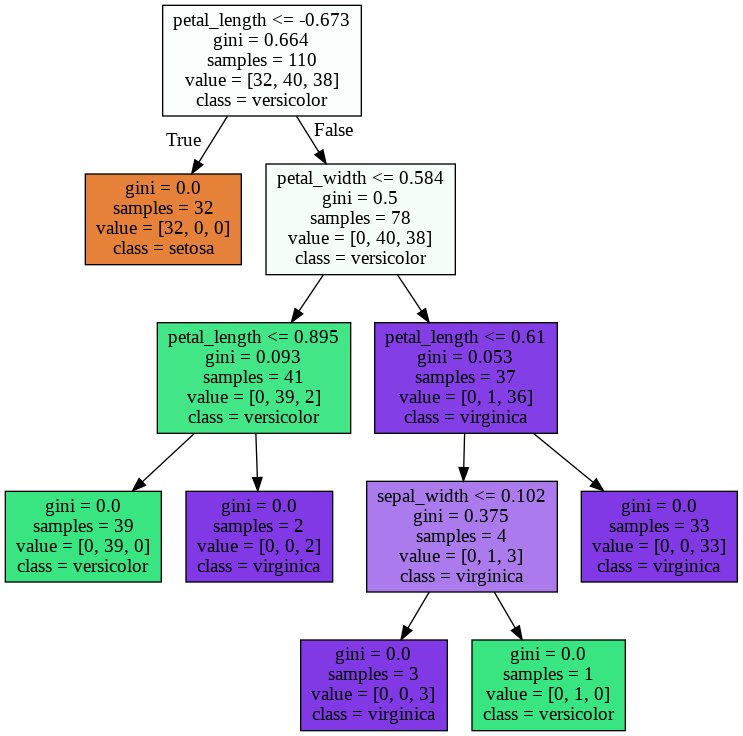

In [10]:
#Displaying decision tree
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz,export_text

graph = export_graphviz(tree,feature_names=X.columns,class_names=Y.unique(),filled=True)
graph = pydotplus.graph_from_dot_data(graph)
Image(graph.create_png())

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
Y_pred = tree.predict(X_test)
print("Accuracy of the tree:",accuracy_score(Y_test,Y_pred)*100)

print("Confusion matrix:")
mat = confusion_matrix(Y_test,Y_pred)
print(mat)
report=classification_report(Y_test,Y_pred,target_names=Y.unique(), output_dict=True)
print("Classification report",report)

Accuracy of the tree: 97.2972972972973
Confusion matrix:
[[ 9  0  0]
 [ 0 14  0]
 [ 0  1 13]]
Classification report {'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9}, 'versicolor': {'precision': 0.9333333333333333, 'recall': 1.0, 'f1-score': 0.9655172413793104, 'support': 14}, 'virginica': {'precision': 1.0, 'recall': 0.9285714285714286, 'f1-score': 0.962962962962963, 'support': 14}, 'accuracy': 0.972972972972973, 'macro avg': {'precision': 0.9777777777777779, 'recall': 0.9761904761904763, 'f1-score': 0.9761600681140911, 'support': 37}, 'weighted avg': {'precision': 0.9747747747747747, 'recall': 0.972972972972973, 'f1-score': 0.9729384556970765, 'support': 37}}


Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4499f6d1d0>)

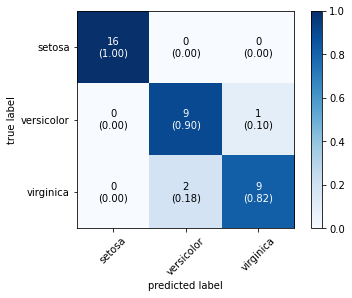

In [12]:
!pip install mlxtend --upgrade --no-deps
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
plot_confusion_matrix(conf_mat=mat, colorbar=True, show_absolute=True, show_normed=True, class_names=Y.unique())

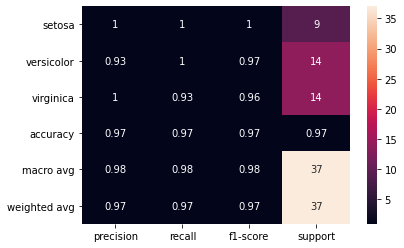

In [26]:
import seaborn as sns
sns.heatmap(pd.DataFrame(report).T,annot=True)

In [21]:
#Random sampling
limit=15
Ratio=0.25
acc=[]
for i in range(limit):
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=Ratio)
  clf=DecisionTreeClassifier(criterion="entropy")
  clf=clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  acc.append(accuracy_score(Y_test,Y_pred))
print(sum(acc)/limit*100)

93.5135135135135


In [20]:
#K-cross validation
from sklearn.model_selection import cross_val_score
k=10 
score = cross_val_score(DecisionTreeClassifier(),X,Y,cv=k)

print("Accuracy of 10 splits:",score*100)
print("Mean accuracy:",score.mean()*100)

Accuracy of 10 splits: [100.          93.33333333 100.          93.33333333  93.33333333
  86.66666667  93.33333333 100.         100.         100.        ]
Mean accuracy: 96.0


In [18]:
#For naive bayes classifer
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [17]:
#For K-nearest neighours
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)

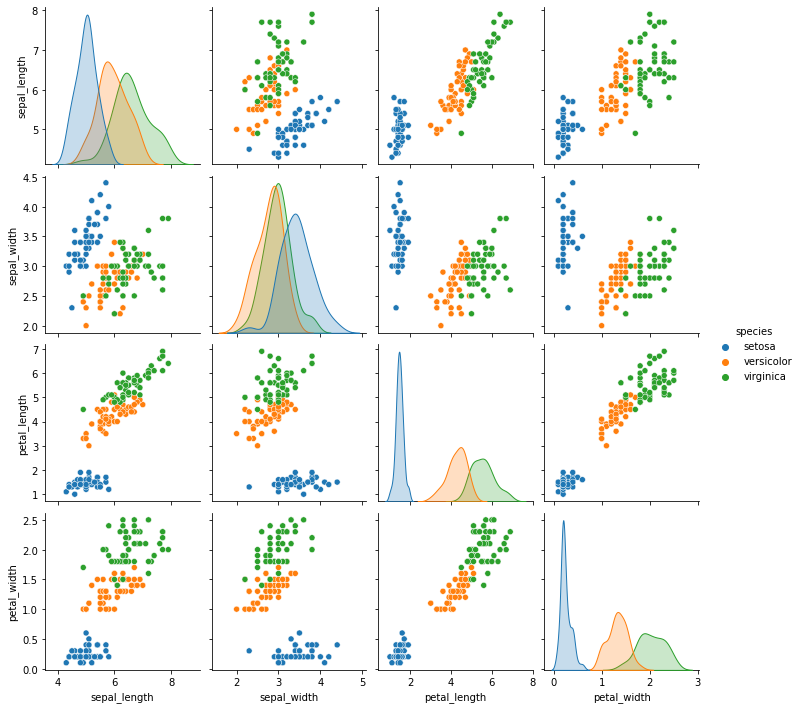

In [34]:
#Scatterplot for iris dataset
sns.pairplot(df,hue='species')

In [28]:
from sklearn.metrics import classification_report

def Accu_conf(clf,X,Y):
  #For holdout method
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
  clf.fit(X_train,Y_train)

  Y_pred = clf.predict(X_test)
  report=classification_report(Y_test,Y_pred,target_names=Y.unique(), output_dict=True)

  print("Accuracy:",accuracy_score(Y_test,Y_pred)*100)
  print("Confusion matrix:")
  print(confusion_matrix(Y_test,Y_pred))
  print("Classification report:\n",report)

In [29]:
#Accuracy and confusion matrix for  different classifiers
print("For K-nearest neighours:")
Accu_conf(kn,X,Y)

print("\nFor Naive-Bayes classifier")
Accu_conf(nb,X,Y)

print("\nFor Decision tree classifier")
Accu_conf(tree,X,Y)

For K-nearest neighours:
Accuracy: 97.2972972972973
Confusion matrix:
[[10  0  0]
 [ 0 15  0]
 [ 0  1 11]]
Classification report:
 {'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10}, 'versicolor': {'precision': 0.9375, 'recall': 1.0, 'f1-score': 0.967741935483871, 'support': 15}, 'virginica': {'precision': 1.0, 'recall': 0.9166666666666666, 'f1-score': 0.9565217391304348, 'support': 12}, 'accuracy': 0.972972972972973, 'macro avg': {'precision': 0.9791666666666666, 'recall': 0.9722222222222222, 'f1-score': 0.9747545582047685, 'support': 37}, 'weighted avg': {'precision': 0.9746621621621622, 'recall': 0.972972972972973, 'f1-score': 0.9728213486979266, 'support': 37}}

For Naive-Bayes classifier
Accuracy: 91.8918918918919
Confusion matrix:
[[17  0  0]
 [ 0  7  1]
 [ 0  2 10]]
Classification report:
 {'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17}, 'versicolor': {'precision': 0.7777777777777778, 'recall': 0.875, 'f1-score': 0.823529411

In [30]:
def k_fold_acc(clf,X,Y):
  score = cross_val_score(clf,X,Y,cv=10)
  return score.mean()*100

<BarContainer object of 3 artists>

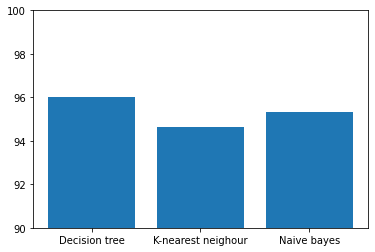

In [31]:
import matplotlib.pyplot as plt

hist_acc=[]
hist_acc.append(k_fold_acc(tree,X,Y))
hist_acc.append(k_fold_acc(kn,X,Y))
hist_acc.append(k_fold_acc(nb,X,Y))

plt.ylim(90,100)
plt.bar(["Decision tree","K-nearest neighour","Naive bayes"],hist_acc)

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
report = []
tree.fit(X_train,Y_train)
Y_pred = tree.predict(X_test)

report.append(classification_report(Y_test,Y_pred,target_names=Y.unique(), output_dict=True))

kn.fit(X_train,Y_train)
Y_pred = kn.predict(X_test)

report.append(classification_report(Y_test,Y_pred,target_names=Y.unique(), output_dict=True))

nb.fit(X_train,Y_train)
Y_pred = nb.predict(X_test)

report.append(classification_report(Y_test,Y_pred,target_names=Y.unique(), output_dict=True))
report

[{'accuracy': 0.9459459459459459,
  'macro avg': {'f1-score': 0.9125,
   'precision': 0.8888888888888888,
   'recall': 0.9607843137254902,
   'support': 37},
  'setosa': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 16},
  'versicolor': {'f1-score': 0.8,
   'precision': 0.6666666666666666,
   'recall': 1.0,
   'support': 4},
  'virginica': {'f1-score': 0.9375,
   'precision': 1.0,
   'recall': 0.8823529411764706,
   'support': 17},
  'weighted avg': {'f1-score': 0.9496621621621623,
   'precision': 0.9639639639639641,
   'recall': 0.9459459459459459,
   'support': 37}},
 {'accuracy': 0.918918918918919,
  'macro avg': {'f1-score': 0.8775048875855328,
   'precision': 0.8571428571428571,
   'recall': 0.9399509803921569,
   'support': 37},
  'setosa': {'f1-score': 0.967741935483871,
   'precision': 1.0,
   'recall': 0.9375,
   'support': 16},
  'versicolor': {'f1-score': 0.7272727272727273,
   'precision': 0.5714285714285714,
   'recall': 1.0,
   'support': 4},
  'virginica'

Text(0.5, 1.0, 'Precision for different classifiers')

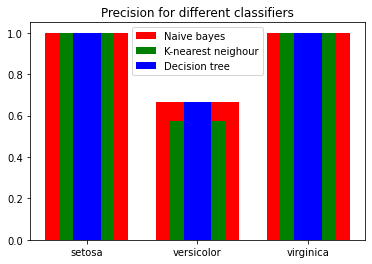

In [49]:
cat = ['setosa','versicolor','virginica']
tree_prec=[]
kn_prec=[]
nb_prec=[]

for i in cat:
 tree_prec.append(report[0][i]['precision']) 
 kn_prec.append(report[1][i]['precision']) 
 nb_prec.append(report[2][i]['precision'])



plt.bar(cat,nb_prec,color='r',width=0.75)
plt.bar(cat,kn_prec,color='g',width=0.5)
plt.bar(cat,tree_prec,color='b',width=0.25)
plt.legend(['Naive bayes','K-nearest neighour','Decision tree'], loc ="upper center")
plt.title('Precision for different classifiers')